<a href="https://colab.research.google.com/github/tariqzia5/ML_Stroke-Prediction/blob/main/Stroke_Prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <center><font color = 'darkpurple'><b>  STROKE PREDICTION</b></font></center>

![](https://media.istockphoto.com/photos/man-with-brain-stroke-symptoms-picture-id1168179082?k=20&m=1168179082&s=612x612&w=0&h=9OY1eRZhghhh4LPvsnxE5vx6G9tVF4piDqvRMrBdp3Y=)

## <font color = 'blue'>Problem Statement :</font>
- `A stroke occurs when the blood supply to part of your brain is interrupted or reduced, preventing brain tissue from getting oxygen and nutrients. Brain cells begin to die in minutes. A stroke is a medical emergency, and prompt treatment is crucial. Early action can reduce brain damage and other complications.`
- `Determine what makes a person at risk for stroke.`
- `Create a machine learning model to perform early detection of stroke for patients.`

# <font color = 'darkpurple'><b>1 <span style='color:#0386f7de'>|</span> Importing Libraries & Loading Dataset</b></font>
- **`For Data Manipulation`**: numpy, pandas, sklearn.
- **`For Data Visualization`**: matplotlib, seaborn, plotly.
- **`For ML Models`**: sklearn.


In [1]:
import numpy as np      
import pandas as pd                  ## Importing Libraries
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split 
import statsmodels.formula.api as smf
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,recall_score,precision_score,confusion_matrix,classification_report,roc_auc_score,roc_curve
import warnings 
warnings.filterwarnings('ignore')

Dataset -
https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

In [2]:
url = 'https://raw.githubusercontent.com/tariqzia5/ML_Stroke-Prediction/main/healthcare-dataset-stroke-data.csv'

In [3]:
data = pd.read_csv(url)    ## Loading Dataset
data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


##  <font color = 'blue'> <span style='color:#0386f7de'>|</span> About the Dataset <a id="prep"></a></font>

-`According to the World Health Organization (WHO) stroke is the 2nd leading cause of death globally, responsible for approximately 11% of total deaths. This dataset is used to predict whether a patient is likely to get stroke based on the input parameters like gender, age, various diseases, and smoking status. Each row in the data provides relavant information about the patient.`

-`Attribute Information`

- `1) Id: Unique identifier.`
- `2) Gender: "Male", "Female" or "Other".`
- `3) Age: Age of the patient.`
- `4) Hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension.`
- `5) Heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease.`
- `6) Ever_married: "No" or "Yes".`
- `7) Work_type: "Children", "Govt job", "Never worked", "Private" or "Self-employed".`
- `8) Residence_type: "Rural" or "Urban".`
- `9) Avg_glucose_level: Average glucose level in blood.`
- `10) BMI: Body Mass Index.`
- `11) Smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown".`
- `12) Stroke: 1 if the patient had a stroke or 0 if not.`


#  <font color = 'darkpurple'><b>2 <span style='color:#0386f7de'>|</span> Exploratory Data Analysis(EDA) <a id="prep"></a></font>

In [ ]:
data.info()  ## To check wheather null value exist or not 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
data.drop(index = data[data['gender']=='Other'].index[0] , axis=0, inplace = True)  ## Dropping other-gender from gender's column

In [ ]:
data.drop('id', axis = 1, inplace = True)  ## Removing 'id' column from the data.

In [ ]:
df = data.copy() 

In [ ]:
df.describe()  ## Describe the data.

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5109.000000,5109.000000,5109.000000,5109.000000,4908.00000,5109.000000
mean,43.229986,0.097475,0.054022,106.140399,28.89456,0.048738
std,22.613575,0.296633,0.226084,45.285004,7.85432,0.215340
min,0.080000,0.000000,0.000000,55.120000,10.30000,0.000000
25%,25.000000,0.000000,0.000000,77.240000,23.50000,0.000000
50%,45.000000,0.000000,0.000000,91.880000,28.10000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.10000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.60000,1.000000


##  <font color = 'blue'><b><span style='color:#0386f7de'>|</span> Data Visualization <a id="prep"></a></font>

###  <font color = 'green'> <span style='color:#0386f7de'>|</span> Categorical Data <a id="prep"></a></font>

####  <font color = 'green'>1.1 <span style='color:#0386f7de'>|</span> Gender <a id="prep"></a></font>

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['gender'].unique())
print('Value Counts\n',df['gender'].value_counts())

Unique values
 ['Male' 'Female']
Value Counts
 Female    2994
Male      2115
Name: gender, dtype: int64


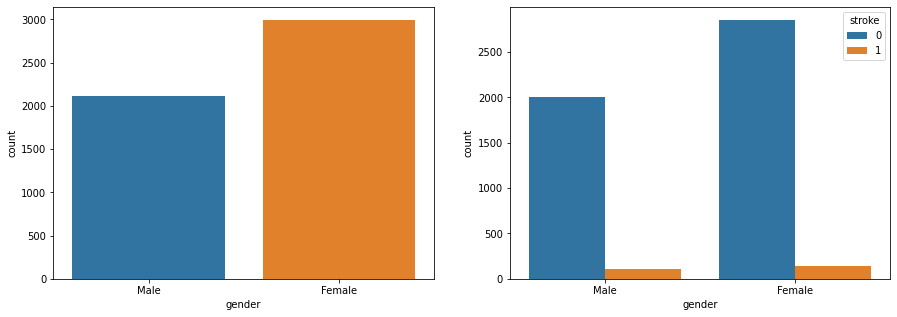

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Gender Visualization.
sns.countplot(df['gender'], data=df, ax = axes[0])
sns.countplot(df['gender'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:- We can see that, there is not much difference between stroke rate concerning gender.

####  <font color = 'green'>1.2 <span style='color:#0386f7de'>|</span> Hypertension <a id="prep"></a></font>

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['hypertension'].unique())
print('Value Counts\n',df['hypertension'].value_counts())

Unique values
 [0 1]
Value Counts
 0    4611
1     498
Name: hypertension, dtype: int64


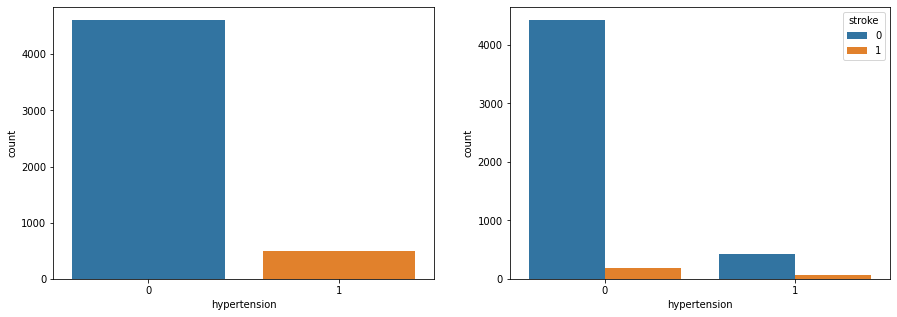

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Hypertension Visualization.
sns.countplot(df['hypertension'], data=df, ax = axes[0])
sns.countplot(df['hypertension'], hue='stroke', data=df, ax = axes[1])
plt.show()

Observation:- Hypertension is rare in young people and common in aged people. Hypertension can cause a stroke. It has quite little data on patients having hypertension.

####  <font color = 'green'>1.3 <span style='color:#0386f7de'>|</span> Heart Disease <a id="prep"></a></font>

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['heart_disease'].unique())
print('Value Counts\n',df['heart_disease'].value_counts())

Unique values
 [1 0]
Value Counts
 0    4833
1     276
Name: heart_disease, dtype: int64


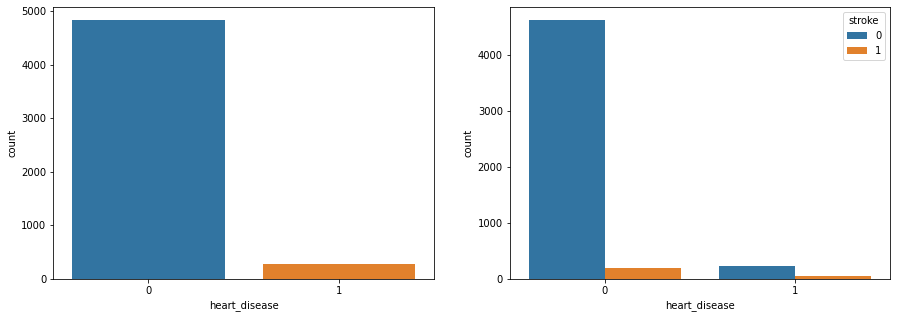

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Heart_Disease Visualization.
sns.countplot(df['heart_disease'], data=df, ax = axes[0])
sns.countplot(df['heart_disease'], hue='stroke', data=df, ax = axes[1])
plt.show()

It’s a little bit difficult to get an idea. But as per this plot, we can say that heart disease is not affecting Stroke.

####  <font color = 'green'>1.4 <span style='color:#0386f7de'>|</span> Marital Status <a id="prep"></a></font>

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['ever_married'].unique())
print('Value Counts\n',df['ever_married'].value_counts())

Unique values
 ['Yes' 'No']
Value Counts
 Yes    3353
No     1756
Name: ever_married, dtype: int64


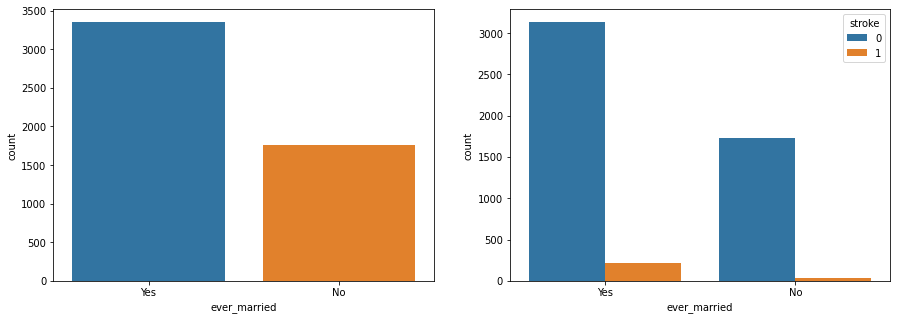

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Ever_Married Visualization.
sns.countplot(df['ever_married'], data=df, ax = axes[0])
sns.countplot(df['ever_married'], hue='stroke', data=df, ax = axes[1])
plt.show()

As per the plot, there is little bit possibility that married person can have stroke.

####  <font color = 'green'>1.5 <span style='color:#0386f7de'>|</span> Work Type <a id="prep"></a></font>

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['work_type'].unique())
print('Value Counts\n',df['work_type'].value_counts())

Unique values
 ['Private' 'Self-employed' 'Govt_job' 'children' 'Never_worked']
Value Counts
 Private          2924
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


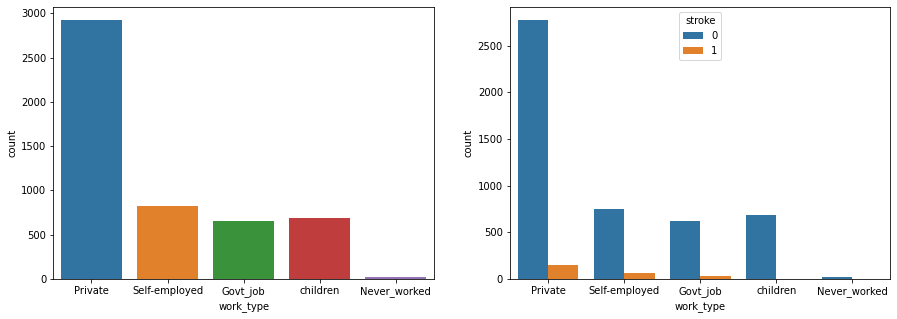

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Work_Type Visualization.
sns.countplot(df['work_type'], data=df, ax = axes[0])
sns.countplot(df['work_type'], hue='stroke', data=df, ax = axes[1])
plt.show()

People working in the Private sector have a higher risk of getting a stroke. And people who have never worked have a very less stroke rate.

####  <font color = 'green'>1.6 <span style='color:#0386f7de'>|</span> Residence Type <a id="prep"></a></font>

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['Residence_type'].unique())
print('Value Counts\n',df['Residence_type'].value_counts())

Unique values
 ['Urban' 'Rural']
Value Counts
 Urban    2596
Rural    2513
Name: Residence_type, dtype: int64


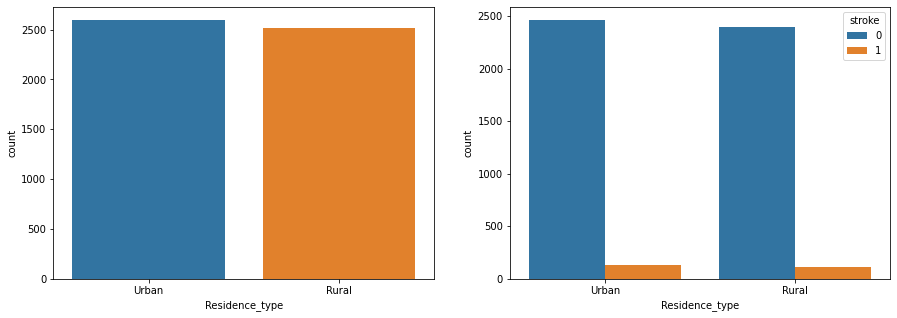

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Residence_Type Visualization.
sns.countplot(df['Residence_type'], data=df, ax = axes[0])
sns.countplot(df['Residence_type'], hue='stroke', data=df, ax = axes[1])
plt.show()

As we can see there not much difference in both attribute values. 

####  <font color = 'green'>1.7 <span style='color:#0386f7de'>|</span> Smoking Status <a id="prep"></a></font>

In [ ]:
# This will help to give us information about it's unique values and count of each value.
print('Unique values\n',df['smoking_status'].unique())
print('Value Counts\n',df['smoking_status'].value_counts())

Unique values
 ['formerly smoked' 'never smoked' 'smokes' 'Unknown']
Value Counts
 never smoked       1892
Unknown            1544
formerly smoked     884
smokes              789
Name: smoking_status, dtype: int64


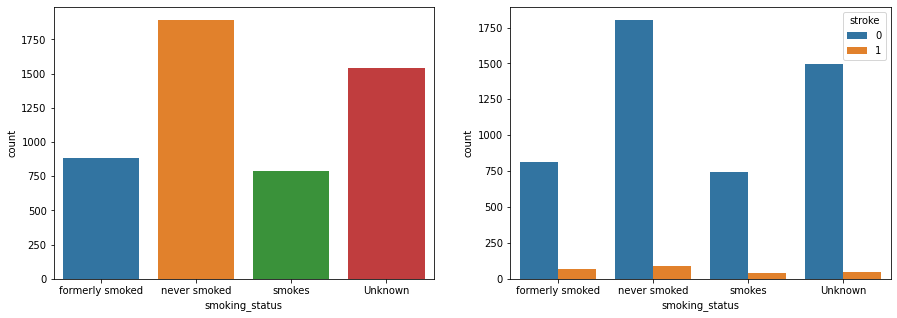

In [ ]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(15,5))      ## Smoking_Status Visualization.
sns.countplot(df['smoking_status'], data=df, ax = axes[0])
sns.countplot(df['smoking_status'], hue='stroke', data=df, ax = axes[1])
plt.show()

As per these plots, we can see there is not much difference in the chances of stroke irrespective of smoking status.

####  <font color = 'green'>1.8 <span style='color:#0386f7de'>|</span> Stroke <a id="prep"></a></font>

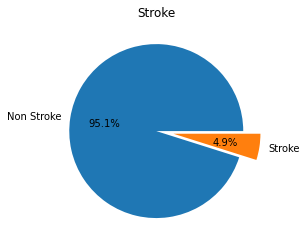

In [ ]:
plt.title("Stroke")     ## Stroke Visualization
plt.pie(np.array(df['stroke'].value_counts()),labels=['Non Stroke','Stroke'],explode=[0,0.2],autopct='%1.1f%%')
plt.show()

###  <font color = 'green'> <span style='color:#0386f7de'>|</span> Numerical Data <a id="prep"></a></font>

####  <font color = 'green'>2.1 <span style='color:#0386f7de'>|</span> Age <a id="prep"></a></font>

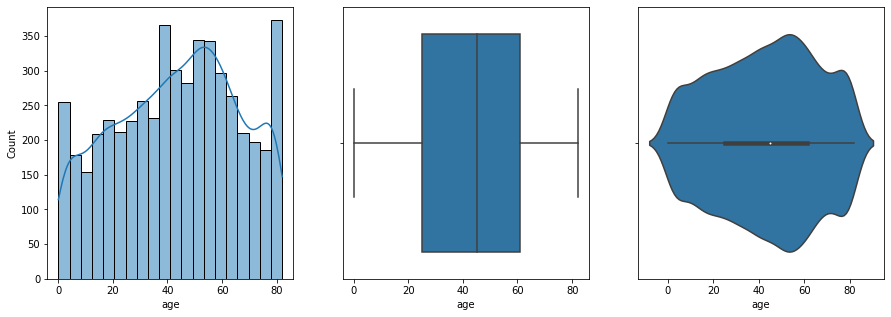

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['age'], ax = ax[0], kde=True)     ## Age Visualization
sns.boxplot(data = df, x = df['age'], ax = ax[1])
sns.violinplot(data = df, x = df['age'], ax = ax[2])
plt.show()

####  <font color = 'green'>2.2 <span style='color:#0386f7de'>|</span> Average_glucose_level <a id="prep"></a></font>

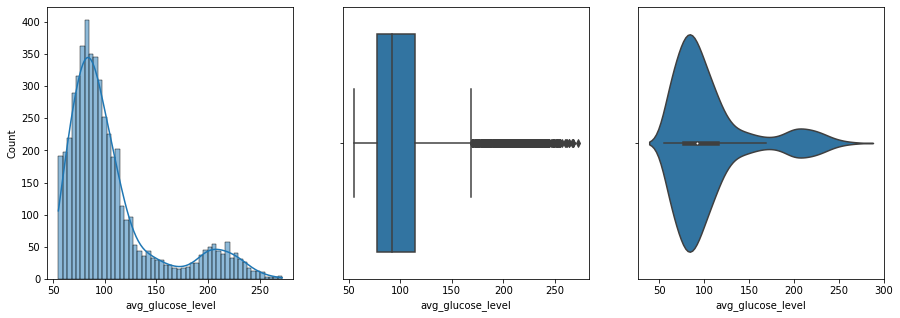

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['avg_glucose_level'], ax = ax[0], kde=True)    ## Glucose_level Visualization
sns.boxplot(data = df, x = df['avg_glucose_level'], ax = ax[1])
sns.violinplot(data = df, x = df['avg_glucose_level'], ax = ax[2])
plt.show()

[Link](https://www.lark.com/resources/blood-sugar-chart)

There are outliers present in avgerage_glucose column, we dont have to remove the outliers.

If we will not remove it will be help to our model to predict or perform well.

####  <font color = 'green'>2.3 <span style='color:#0386f7de'>|</span>BMI <a id="prep"></a></font>

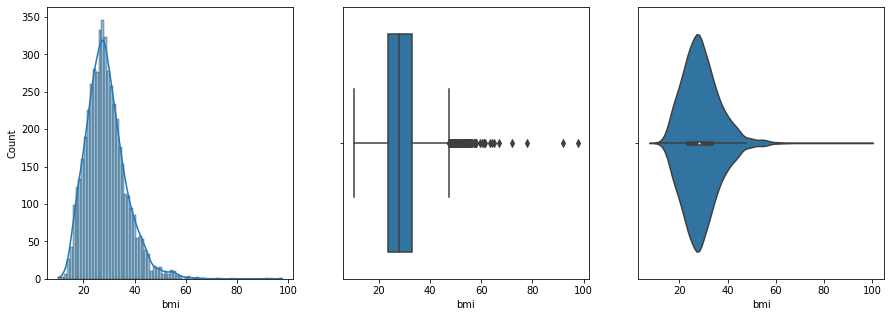

In [ ]:
fig,ax=plt.subplots(1,3,figsize=(15,5))
sns.histplot(df['bmi'], ax = ax[0], kde=True)     ## BMI Visualization
sns.boxplot(data = df, x = df['bmi'], ax = ax[1])
sns.violinplot(data = df, x = df['bmi'], ax = ax[2])
plt.show()

##  <font color = 'blue'><b><span style='color:#0386f7de'>|</span> Cleaning Data <a id="prep"></a></font>

In [ ]:
df.isnull().sum()   ##  Drop nulls or treat null values as instructed

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

The dataset contains some missing values in bmi column.Let's try to remove or fill that first before moving on. Looking into it I found that bmi mostly depends on age and gender. So trying to impute missing values based on gender.


After looking the data we get to know that there are 201 NA values in _bmi_ column, so for treating the data we will put the nan values as median.

In [ ]:
df['bmi'].median()

28.1

In [ ]:
df = df.fillna(28.1)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5109 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5109 non-null   object 
 1   age                5109 non-null   float64
 2   hypertension       5109 non-null   int64  
 3   heart_disease      5109 non-null   int64  
 4   ever_married       5109 non-null   object 
 5   work_type          5109 non-null   object 
 6   Residence_type     5109 non-null   object 
 7   avg_glucose_level  5109 non-null   float64
 8   bmi                5109 non-null   float64
 9   smoking_status     5109 non-null   object 
 10  stroke             5109 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 608.0+ KB


Looking at the BMI Visualization of box plot, we can see there are outliers in our data.

In [ ]:
df['bmi_1'] = np.log(df['bmi'])

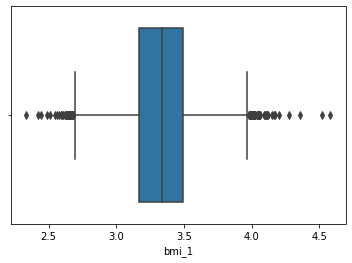

In [ ]:
sns.boxplot(data = df, x = df['bmi_1'])
plt.show()

In [ ]:
df.drop('bmi', axis = 1, inplace = True )  ## Dropping earlier column of bmi

In [ ]:
df_1 = df.copy()

##  <font color = 'blue'><b><span style='color:#0386f7de'>|</span> Convert Non-numerical Data into Numerical <a id="prep"></a></font>

In [ ]:
df_1["gender"][df_1["gender"]=="Male"] = 1
df_1["gender"][df_1["gender"]=="Female"] = 0

In [ ]:
df_1["ever_married"][df_1["ever_married"]=="Yes"]=1
df_1["ever_married"][df_1["ever_married"]=="No"]=0

In [ ]:
df_1["Residence_type"][df_1["Residence_type"]=="Urban"]=1
df_1["Residence_type"][df_1["Residence_type"]=="Rural"]=0

In [ ]:
df_1["work_type"][df_1["work_type"]=="Private"]=1
df_1["work_type"][df_1["work_type"]=="Self-employed"]=2
df_1["work_type"][df_1["work_type"]=="Govt_job"]=3
df_1["work_type"][df_1["work_type"]=="children"]=4
df_1["work_type"][df_1["work_type"]=="Never_worked"]=5

In [ ]:
df_1["smoking_status"][df_1["smoking_status"]=="never smoked"]=1
df_1["smoking_status"][df_1["smoking_status"]=="Unknown"]=2
df_1["smoking_status"][df_1["smoking_status"]=="formerly smoked"]=3
df_1["smoking_status"][df_1["smoking_status"]=="smokes"]=4

## <font color = 'blue'><b> <span style='color:#0386f7de'>|</span> Splitting data into train & test set <a id="prep"></a></font>

In [ ]:
X = df_1.drop(columns = 'stroke')  
y = df_1[['stroke']]

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X, y, random_state = 12, stratify = y )  ## Spliting data into train and test.

In [ ]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape   ## Shape of the train and test data.

((3831, 10), (1278, 10), (3831, 1), (1278, 1))

#  <font color = 'darkpurple'><b>3 <span style='color:#0386f7de'>|</span> Model Building (Simple Models) <a id="prep"></a></font>

###  <font color = 'blue'><b>3.1 <span style='color:#0386f7de'>|</span> Logistic Regression <a id="prep"></a></font>

In [ ]:
logistic_model = LogisticRegression()    ## Importing Model 
logistic_model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
# Checking the intercept and coefficient values.
print("Intercept =" , logistic_model.intercept_)
print("coefficients = \n " , logistic_model.coef_)

Intercept = [-5.36837385]
coefficients = 
  [[-0.2043421   0.07291183  0.72066752  0.26310648 -0.52654313 -0.01860042
   0.01958578  0.00295792  0.0739331  -0.56311405]]


In [ ]:
# calculating the Accuracy, Sensitivity, Specificity  of the model on train data

predict1 = logistic_model.predict(X_train)
cm1 = confusion_matrix(y_train,predict1)
print("COnfusion matrix = \n" , cm1)

total1 = sum(sum(cm1))
Accuracy = (cm1[0,0] + cm1[1,1]) / total1
print("Overall accuracy on train data for all the variables = " , Accuracy)
print ('Accuracy : ', Accuracy)

Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', Sensitivity )

Specificity  = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', Specificity )

COnfusion matrix = 
 [[3643    1]
 [ 186    1]]
Overall accuracy on train data for all the variables =  0.9511876794570608
Accuracy :  0.9511876794570608
Sensitivity :  0.9997255762897914
Specificity :  0.0053475935828877


In [ ]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    logistic = LogisticRegression()
    logistic.fit(X_train,y_train)

    # Predicting using the test data
    predict = logistic.predict(X_train)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    logistic = LogisticRegression()
    logistic.fit(X_test,y_test)

    # Predicting using the test data
    predict = logistic.predict(X_test)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [0.9496644295302014, 0.9510626398210291, 0.9502237136465325, 0.9532997762863534, 0.9510626398210291, 0.9482662192393736, 0.9513422818791947, 0.9499440715883669, 0.9521812080536913, 0.9530201342281879, 0.9524608501118568, 0.9485458612975392, 0.9488255033557047, 0.9538590604026845, 0.9530201342281879, 0.950503355704698, 0.9524608501118568, 0.956096196868009, 0.9524608501118568, 0.9477069351230425, 0.950503355704698, 0.9538590604026845, 0.9519015659955258, 0.9524608501118568, 0.9521812080536913, 0.9460290827740492, 0.9513422818791947, 0.9544183445190156, 0.9532997762863534, 0.9544183445190156, 0.9521812080536913, 0.9482662192393736, 0.9524608501118568, 0.9507829977628636, 0.9510626398210291, 0.950503355704698, 0.9507829977628636, 0.9558165548098434, 0.9510626398210291, 0.9538590604026845, 0.9513422818791947, 0.9507829977628636, 0.9507829977628636, 0.9488255033557047, 0.953579418344519, 0.9519015659955258, 0.9513422818791947, 0.9519015659955258, 0.9496644295302014, 

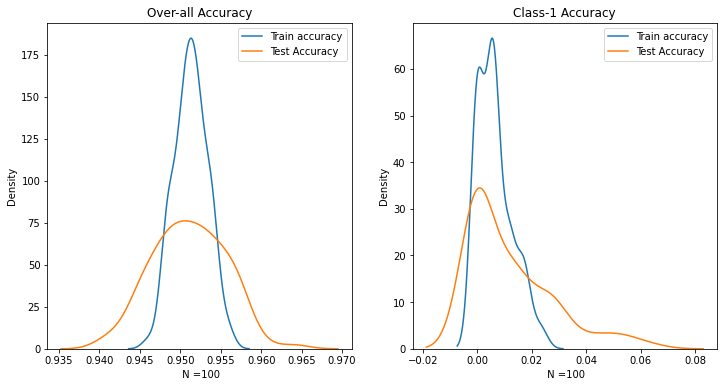

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

###  <font color = 'blue'><b>3.2 <span style='color:#0386f7de'>|</span> Decision Tree<a id="prep"></a></font>

In [ ]:
feature = ['age','hypertension','heart_disease','avg_glucose_level','bmi_1','gender_Male','ever_married_Yes',	'work_type_Never_worked',	'work_type_Private',	'work_type_Self-employed',	'work_type_children',	'Residence_type_Urban',	'smoking_status_formerly smoked',	'smoking_status_never smoked',	'smoking_status_smokes']

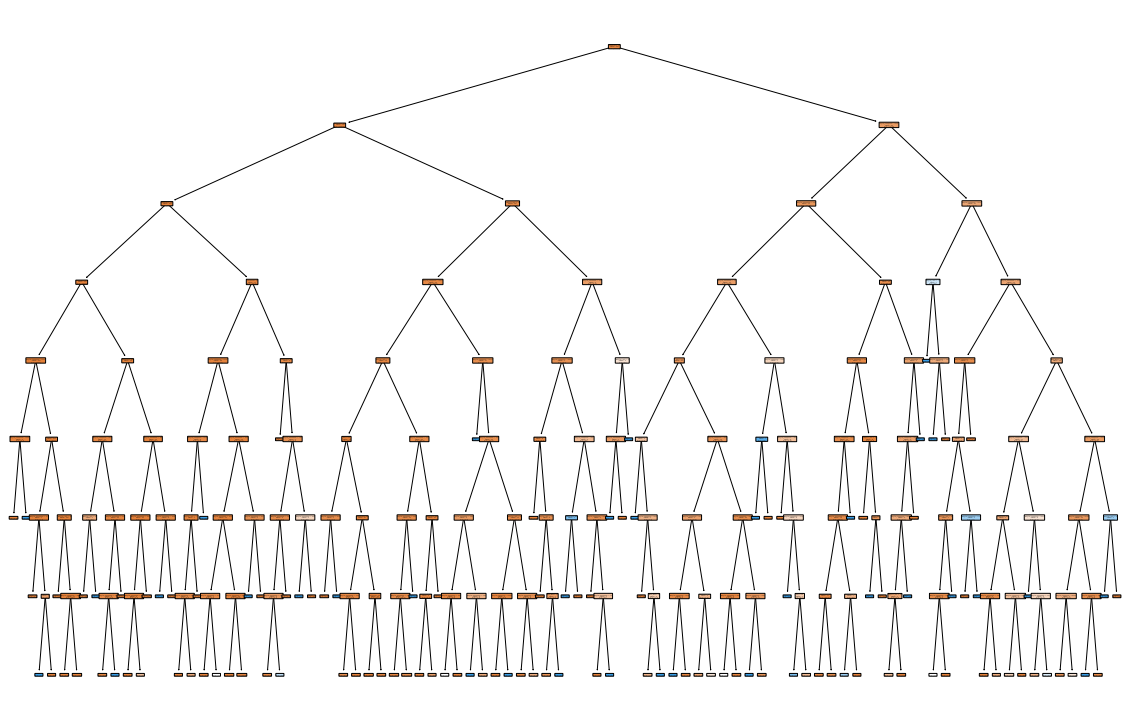

In [ ]:
from sklearn import tree
#Building Tree Model
DTree = tree.DecisionTreeClassifier(max_depth=8)
DTree.fit(X,y)

##Plotting the trees 
from sklearn.tree import plot_tree
plt.figure(figsize=(20,13))
plot_tree(DTree, filled=True, 
                     rounded=True,
                     impurity=False,
                     feature_names = feature)
plt.show()

In [ ]:
dt_model = DecisionTreeClassifier(random_state=12,max_depth=8)
dt_model.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=8, random_state=12)

In [ ]:
predict1 = dt_model.predict(X_train)
predict2 = dt_model.predict(X_test)

cm = confusion_matrix(y_train, predict1)
print ("CM:",   cm)

#On Train Data
cm1 = confusion_matrix(y_train,predict1)
total1 = sum(sum(cm1))
accuracy1 = (cm1[0,0]+cm1[1,1])/total1
print("Train Accuracy", accuracy1)

#On Test Data
cm2 = confusion_matrix(y_test,predict2)
total2 = sum(sum(cm2))
accuracy2 = (cm2[0,0]+cm2[1,1])/total2
print("Test Accuracy", accuracy2)

Sensitivity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
print('Sensitivity : ', Sensitivity )

Specificity  = cm1[1,1]/(cm1[1,0]+cm1[1,1])
print('Specificity : ', Specificity )

CM: [[3381   14]
 [ 115   66]]
Train Accuracy 0.9639261744966443
Test Accuracy 0.9412915851272016
Sensitivity :  0.9958762886597938
Specificity :  0.36464088397790057


In [ ]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train,y_train)

    # Predicting using the test data
    predict = dt_model.predict(X_train)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train,y_train)

    # Predicting using the test data
    predict = dt_model.predict(X_test)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [0.964765100671141, 0.9653243847874721, 0.9672818791946308, 0.9692393736017897, 0.9667225950782998, 0.9678411633109619, 0.9695190156599552, 0.968400447427293, 0.9656040268456376, 0.9644854586129754, 0.9697986577181208, 0.964765100671141, 0.968400447427293, 0.9720357941834452, 0.9700782997762863, 0.9664429530201343, 0.9723154362416108, 0.9675615212527964, 0.9672818791946308, 0.9678411633109619, 0.9619686800894854, 0.9653243847874721, 0.9616890380313199, 0.9625279642058165, 0.9658836689038032, 0.9714765100671141, 0.9653243847874721, 0.968400447427293, 0.9653243847874721, 0.9678411633109619, 0.9667225950782998, 0.9658836689038032, 0.9675615212527964, 0.9689597315436241, 0.9686800894854586, 0.970917225950783, 0.964765100671141, 0.9628076062639821, 0.9672818791946308, 0.9717561521252797, 0.964765100671141, 0.968400447427293, 0.9628076062639821, 0.9661633109619687, 0.9700782997762863, 0.9681208053691275, 0.9670022371364653, 0.9672818791946308, 0.9656040268456376, 0.97

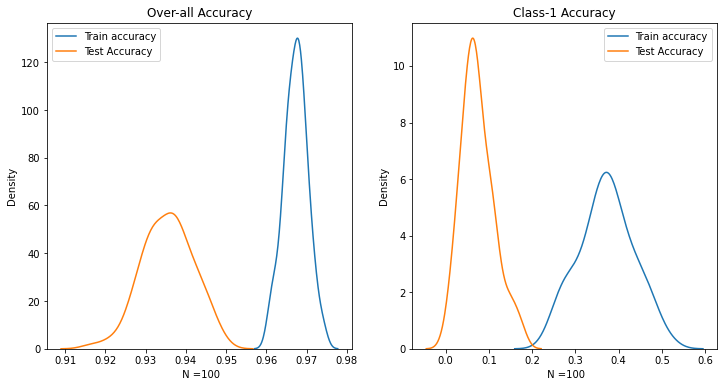

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

#  <font color = 'darkpurple'><b>4<span style='color:#0386f7de'>|</span> Feature Engineering <a id="prep"></a></font>

###  <font color = 'blue'><b>4.1 <span style='color:#0386f7de'>|</span> One Hot Encoding  <a id="prep"></a></font>

In [ ]:
df_2 = df.copy()

In [ ]:
num_cols = ['age','avg_glucose_level','bmi_1']         ## Dividing numerical and categorical data for numerical.
cat_col = ['work_type','smoking_status']
cat_cols = ['gender','ever_married','Residence_type']

In [ ]:
df_encc = pd.get_dummies(df_2[cat_cols], drop_first=True)
df_enc = pd.get_dummies(df_2[cat_col])

In [ ]:
df_2[df_encc.columns] = df_encc
df_2[df_enc.columns] = df_enc
df_2.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,smoking_status,stroke,...,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,formerly smoked,1,...,1,0,0,1,0,0,0,1,0,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,never smoked,1,...,0,0,0,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,never smoked,1,...,0,0,0,1,0,0,0,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,smokes,1,...,1,0,0,1,0,0,0,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,never smoked,1,...,0,0,0,0,1,0,0,0,1,0


In [ ]:
df_2.drop(['gender','ever_married','work_type','Residence_type','smoking_status'], axis =1, inplace = True)

In [ ]:
df_2

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_1,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,1,3.600048,1,1,1,0,0,1,0,0,0,1,0,0
1,61.0,0,0,202.21,1,3.335770,0,1,0,0,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,1,3.481240,1,1,0,0,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,1,3.538057,0,1,1,0,0,1,0,0,0,0,0,1
4,79.0,1,0,174.12,1,3.178054,0,1,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5105,80.0,1,0,83.75,0,3.335770,0,1,1,0,0,1,0,0,0,0,1,0
5106,81.0,0,0,125.20,0,3.688879,0,1,1,0,0,0,1,0,0,0,1,0
5107,35.0,0,0,82.99,0,3.421000,0,1,0,0,0,0,1,0,0,0,1,0
5108,51.0,0,0,166.29,0,3.242592,1,1,0,0,0,1,0,0,0,1,0,0


##  <font color = 'blue'><b>4.2 <span style='color:#0386f7de'>|</span> Over Sampling <a id="prep"></a></font>

Looking at stroke visualization, we can tell that our data is not equally distributed. So here we will use over sampling method to balance our target variable.

In [ ]:
print("Actual Data :", df_2.shape)

#Frequency count on target column
freq = df_2['stroke'].value_counts()
print(freq)
print((freq/freq.sum())*100)

#Classwise data
stroke_class0 = df_2[df_2['stroke'] == 0]
stroke_class1 = df_2[df_2['stroke'] == 1]

print("Class0 Actual :", stroke_class0.shape)
print("Class1 Actual  :", stroke_class1.shape)


Actual Data : (5109, 18)
0    4860
1     249
Name: stroke, dtype: int64
0    95.126248
1     4.873752
Name: stroke, dtype: float64
Class0 Actual : (4860, 18)
Class1 Actual  : (249, 18)


In [ ]:
##Undersampling of class-0
## Consider half of class-0
stroke_class0_under = stroke_class0.sample(int(0.5*len(stroke_class0)))
print("Class0 Undersample :", stroke_class0_under.shape)

##Oversampling of Class-1 
# Lets increase the size by four times
stroke_class1_over = stroke_class1.sample(8*len(stroke_class1),replace=True)
print("Class1 Oversample :", stroke_class1_over.shape)

#Concatenate to create the final balanced data
stroke_balanced=pd.concat([stroke_class0_under,stroke_class1_over])
print("Final Balannced Data :", stroke_balanced.shape)

#Frequency count on target column in the balanced data
freq=stroke_balanced['stroke'].value_counts()
print(freq)
print((freq/freq.sum())*100)


Class0 Undersample : (2430, 18)
Class1 Oversample : (1992, 18)
Final Balannced Data : (4422, 18)
0    2430
1    1992
Name: stroke, dtype: int64
0    54.95251
1    45.04749
Name: stroke, dtype: float64


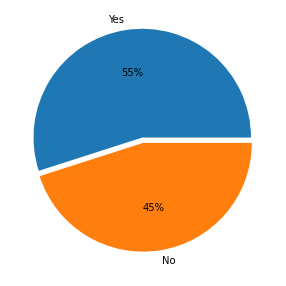

In [ ]:
plt.figure(figsize=(8,5))
plt.pie(x=stroke_balanced['stroke'].value_counts(),explode=(0.05,0),autopct='%1.0f%%',labels=['Yes','No'])
plt.show()

##  <font color = 'blue'><b>4.3 <span style='color:#0386f7de'>|</span> Correlation Matrix  <a id="prep"></a></font>

In [ ]:
stroke_balanced

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_1,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
1079,36.0,0,0,82.47,0,3.499533,0,1,0,1,0,0,0,0,0,0,0,1
2162,47.0,0,0,122.32,0,3.173878,0,1,1,1,0,0,0,0,1,0,0,0
4673,42.0,0,0,112.98,0,3.616309,0,1,0,1,0,0,0,0,0,1,0,0
2587,39.0,0,0,71.30,0,3.546740,1,1,0,0,0,1,0,0,0,0,1,0
2530,16.0,0,0,134.23,0,3.421000,1,0,0,0,0,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
190,65.0,0,0,205.77,1,3.828641,0,1,1,0,0,1,0,0,0,1,0,0
129,75.0,0,0,62.48,1,3.335770,0,1,1,1,0,0,0,0,1,0,0,0
8,59.0,0,0,76.15,1,3.335770,0,1,0,0,0,1,0,0,1,0,0,0
36,74.0,0,0,219.72,1,3.517498,1,1,0,0,0,1,0,0,0,1,0,0


In [ ]:
df_3 = stroke_balanced.copy()

In [ ]:
corr_matrix = df_3.corr()   ## Corrlation Matrix.
corr_matrix

,age,hypertension,heart_disease,avg_glucose_level,stroke,bmi_1,gender_Male,ever_married_Yes,Residence_type_Urban,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
age,1.000000,0.276241,0.272131,0.286875,0.573615,0.266634,-0.000342,0.574444,0.006282,0.069693,-0.086981,0.066366,0.279411,-0.607256,-0.299357,0.205415,0.086735,0.011316
hypertension,0.276241,1.000000,0.083487,0.181782,0.231880,0.144574,-0.005365,0.091154,-0.026679,-0.013669,-0.023461,-0.068906,0.187193,-0.131655,-0.182093,0.054424,0.116639,0.002492
heart_disease,0.272131,0.083487,1.000000,0.239267,0.231207,0.053857,0.130495,0.092536,0.031174,0.025668,-0.018436,0.035866,0.006491,-0.103453,-0.065466,0.047425,-0.079810,0.128202
avg_glucose_level,0.286875,0.181782,0.239267,1.000000,0.277782,0.251029,0.092554,0.208627,0.023874,0.007473,-0.013288,0.086638,-0.018465,-0.137380,-0.092022,0.050733,0.017056,0.029831
stroke,0.573615,0.231880,0.231207,0.277782,1.000000,0.145060,0.016724,0.270520,0.030675,0.011044,-0.047229,0.010771,0.137814,-0.229630,-0.128037,0.115281,-0.004218,0.027985
bmi_1,0.266634,0.144574,0.053857,0.251029,0.145060,1.000000,0.008142,0.295816,0.023001,0.044697,-0.032478,0.191838,0.029722,-0.443757,-0.250912,0.101102,0.093542,0.061696
gender_Male,-0.000342,-0.005365,0.130495,0.092554,0.016724,0.008142,1.000000,0.019768,-0.038363,-0.059611,0.018487,0.055295,-0.052815,0.048154,0.031522,0.088577,-0.137722,0.043102
ever_married_Yes,0.574444,0.091154,0.092536,0.208627,0.270520,0.295816,0.019768,1.000000,-0.036823,0.058774,-0.090982,0.129608,0.146642,-0.510550,-0.271330,0.181645,0.011250,0.102972
Residence_type_Urban,0.006282,-0.026679,0.031174,0.023874,0.030675,0.023001,-0.038363,-0.036823,1.000000,0.029710,0.005754,-0.019729,-0.000902,-0.000614,0.026989,-0.040838,-0.030518,0.053426
work_type_Govt_job,0.069693,-0.013669,0.025668,0.007473,0.011044,0.044697,-0.059611,0.058774,0.029710,1.000000,-0.020026,-0.458169,-0.193387,-0.112376,-0.030051,-0.005844,0.024892,0.009619


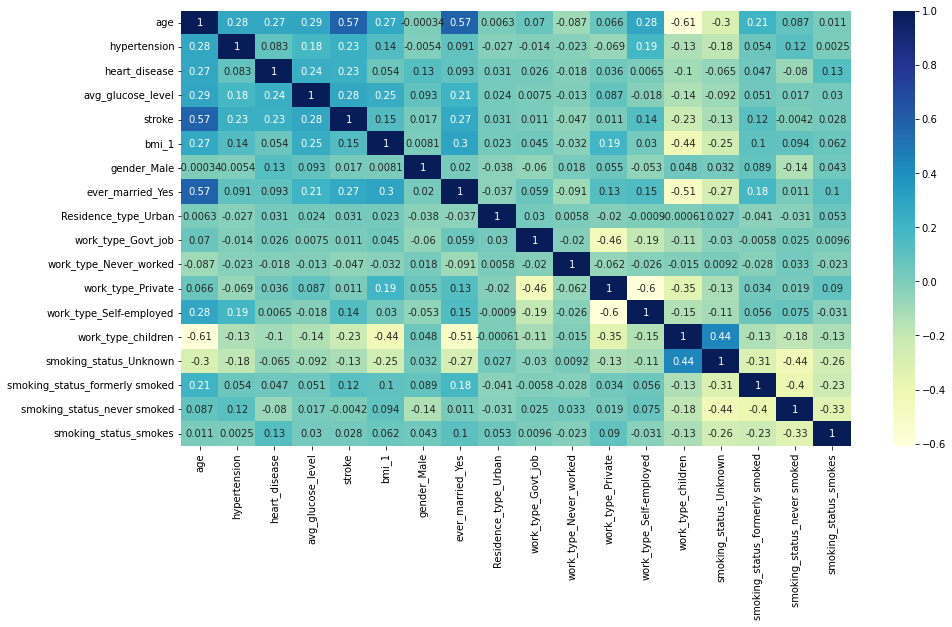

In [ ]:
plt.figure(figsize=(15,8))
sns.heatmap(corr_matrix,annot=True,cmap="YlGnBu")    ## Heat map 
plt.show()

## <font color = 'blue'><b>4.4 <span style='color:#0386f7de'>|</span> Splitting data into train & test set <a id="prep"></a></font>

In [ ]:
X_1 = df_3.drop(columns = 'stroke')  
y_1 = df_3[['stroke']]

In [ ]:
X_train_1,X_test_1,y_train_1,y_test_1 = train_test_split(X_1, y_1, random_state = 12)  ## Spliting data into train and test.

In [ ]:
X_train_1.shape,X_test_1.shape,y_train_1.shape,y_test_1.shape   ## Shape of the train and test data.

((3316, 17), (1106, 17), (3316, 1), (1106, 1))

#  <font color = 'darkpurple'><b>5 <span style='color:#0386f7de'>|</span>Model Building<a id="prep"></a></font>

###  <font color = 'blue'><b>5.1 <span style='color:#0386f7de'>|</span> Logistic Regression <a id="prep"></a></font>

In [ ]:
logistic_model = LogisticRegression()    ## Importing Model 
logistic_model.fit(X_train_1,y_train_1)

LogisticRegression()

In [ ]:
logistic_pred_train = logistic_model.predict(X_train_1)
print('Accuracy Score                 :',round(accuracy_score(y_train_1,logistic_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,logistic_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,logistic_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,logistic_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,logistic_pred_train))

Accuracy Score                 : 0.7726
Precision Score                : 0.742
Recall Score                   : 0.753
Confusion Matrix               :
 [[1446  388]
 [ 366 1116]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.80      0.79      0.79      1834
           1       0.74      0.75      0.75      1482

    accuracy                           0.77      3316
   macro avg       0.77      0.77      0.77      3316
weighted avg       0.77      0.77      0.77      3316



In [ ]:
logistic_pred_test = logistic_model.predict(X_test_1)
print('Accuracy Score                 :',round(accuracy_score(y_test_1,logistic_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,logistic_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,logistic_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,logistic_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,logistic_pred_test))

Accuracy Score                 : 0.7694
Precision Score                : 0.7476
Recall Score                   : 0.7549
Confusion Matrix               :
 [[466 130]
 [125 385]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.79      0.78      0.79       596
           1       0.75      0.75      0.75       510

    accuracy                           0.77      1106
   macro avg       0.77      0.77      0.77      1106
weighted avg       0.77      0.77      0.77      1106



Area Under Curve     : 0.7683905777075931


Text(0, 0.5, 'True Positive Rate')

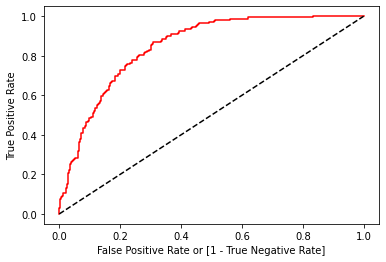

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_1,logistic_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, logistic_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    logistic = LogisticRegression()
    logistic.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = logistic.predict(X_train_1)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    logistic = LogisticRegression()
    logistic.fit(X_test_1,y_test_1)

    # Predicting using the test data
    predict = logistic.predict(X_test_1)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [0.772859450726979, 0.7735056542810985, 0.7809369951534734, 0.7747980613893376, 0.7693053311793215, 0.7670436187399031, 0.7757673667205169, 0.772859450726979, 0.7712439418416801, 0.7757673667205169, 0.7777059773828756, 0.7725363489499192, 0.7773828756058159, 0.7718901453957997, 0.778675282714055, 0.7641357027463651, 0.7825525040387722, 0.778675282714055, 0.7686591276252019, 0.7815831987075929, 0.7683360258481422, 0.7744749596122779, 0.7789983844911147, 0.7760904684975768, 0.7673667205169629, 0.7747980613893376, 0.7783521809369952, 0.7841680129240711, 0.7815831987075929, 0.7738287560581584, 0.7738287560581584, 0.7838449111470113, 0.7696284329563813, 0.7767366720516963, 0.7696284329563813, 0.7689822294022617, 0.7809369951534734, 0.7744749596122779, 0.7705977382875606, 0.7754442649434572, 0.7819063004846527, 0.7654281098546042, 0.7783521809369952, 0.778675282714055, 0.7725363489499192, 0.7825525040387722, 0.7705977382875606, 0.7731825525040388, 0.7751211631663975, 

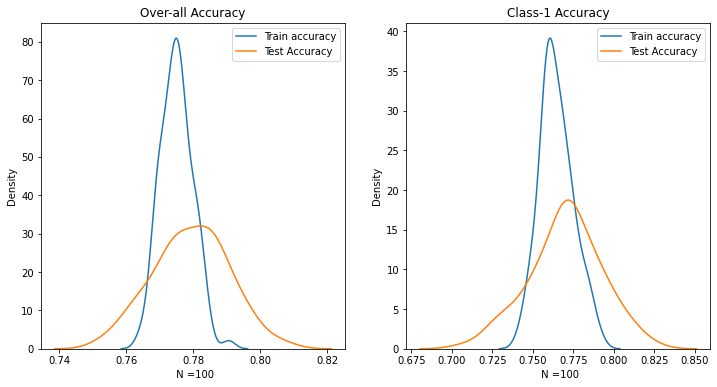

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()

###  <font color = 'blue'><b>5.2 <span style='color:#0386f7de'>|</span> Decision Tree <a id="prep"></a></font>

In [ ]:
dt_model = DecisionTreeClassifier(random_state=15,max_depth=9)
dt_model.fit(X_train_1,y_train_1)

DecisionTreeClassifier(max_depth=9, random_state=15)

In [ ]:
dt_pred_train = dt_model.predict(X_train_1)
print('Accuracy Score                 :',round(accuracy_score(y_train_1,dt_pred_train),4))
print('Precision Score                :',round(precision_score(y_train_1,dt_pred_train),4))
print('Recall Score                   :',round(recall_score(y_train_1,dt_pred_train),4))
print('Confusion Matrix               :\n',confusion_matrix(y_train_1,dt_pred_train))
print('Classification Report          :\n',classification_report(y_train_1,dt_pred_train))

Accuracy Score                 : 0.9296
Precision Score                : 0.8729
Recall Score                   : 0.9886
Confusion Matrix               :
 [[1490  202]
 [  16 1387]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.99      0.88      0.93      1692
           1       0.87      0.99      0.93      1403

    accuracy                           0.93      3095
   macro avg       0.93      0.93      0.93      3095
weighted avg       0.94      0.93      0.93      3095



In [ ]:
dt_pred_test = dt_model.predict(X_test_1)
print('Accuracy Score                 :',round(accuracy_score(y_test_1,dt_pred_test),4))
print('Precision Score                :',round(precision_score(y_test_1,dt_pred_test),4))
print('Recall Score                   :',round(recall_score(y_test_1,dt_pred_test),4))
print('Confusion Matrix               :\n',confusion_matrix(y_test_1,dt_pred_test))
print('Classification Report          :\n',classification_report(y_test_1,dt_pred_test))

Accuracy Score                 : 0.9028
Precision Score                : 0.8382
Recall Score                   : 0.9677
Confusion Matrix               :
 [[628 110]
 [ 19 570]]
Classification Report          :
               precision    recall  f1-score   support

           0       0.97      0.85      0.91       738
           1       0.84      0.97      0.90       589

    accuracy                           0.90      1327
   macro avg       0.90      0.91      0.90      1327
weighted avg       0.91      0.90      0.90      1327



Area Under Curve     : 0.9093452224844829


Text(0, 0.5, 'True Positive Rate')

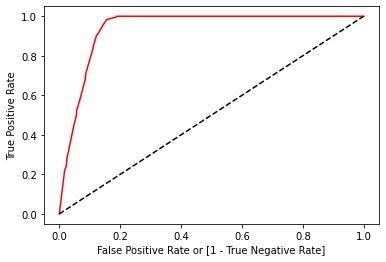

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test_1,dt_model.predict_proba (X_test_1)[:,1])
auc_score = roc_auc_score(y_test_1, dt_pred_test)
print('Area Under Curve     :',auc_score)
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc_score)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [ ]:
n = 100
train_acc = []
test_acc = []
class1_train_acc = []
class1_test_acc = []

for i in range(n):
    
    from sklearn.model_selection import train_test_split
    X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_1,y_1, train_size = 0.7)
    
    
    # Building the logistic regression model on train data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = dt_model.predict(X_train_1)

    # Calculating confusion matrix
    cm= confusion_matrix(y_train_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    train_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_train_acc.append(class1_acc)


    # Building the logistic regression model on test data
    dt_model = DecisionTreeClassifier(random_state=15,max_depth=8)
    dt_model.fit(X_train_1,y_train_1)

    # Predicting using the test data
    predict = dt_model.predict(X_test_1)
  
    # Calculating confusion matrix
    cm = confusion_matrix(y_test_1,predict)

    # Calculating accuracy of the model
    total = sum(sum(cm))
    accuracy = (cm[0,0] + cm[1,1]) / total
    accuracy
    test_acc.append(accuracy)

    # Calculating accuracy of class-1
    total = sum(sum(cm))
    class1_acc = cm[1,1] / (cm[1,1]+cm[1,0]) 
    class1_test_acc.append(class1_acc)


print("Overall Train accuracy:", train_acc , "\n")
print("Overall Test Accuracy:" , test_acc)

Overall Train accuracy: [0.9156704361873991, 0.9179321486268175, 0.9231017770597738, 0.9130856219709208, 0.9105008077544426, 0.908562197092084, 0.9179321486268175, 0.9121163166397415, 0.9201938610662359, 0.9279483037156704, 0.9192245557350566, 0.919870759289176, 0.9127625201938611, 0.9195476575121163, 0.901453957996769, 0.8991922455573506, 0.9211631663974151, 0.9130856219709208, 0.902746365105008, 0.9227786752827141, 0.9033925686591276, 0.9121163166397415, 0.9108239095315024, 0.9127625201938611, 0.8995153473344103, 0.9218093699515347, 0.9082390953150242, 0.9124394184168013, 0.9189014539579967, 0.9153473344103392, 0.901453957996769, 0.9121163166397415, 0.9092084006462036, 0.9156704361873991, 0.9072697899838449, 0.9189014539579967, 0.9101777059773829, 0.8985460420032311, 0.9079159935379645, 0.9121163166397415, 0.8949919224555735, 0.9156704361873991, 0.9092084006462036, 0.9095315024232633, 0.8972536348949919, 0.9134087237479807, 0.9153473344103392, 0.909854604200323, 0.9176090468497576, 0

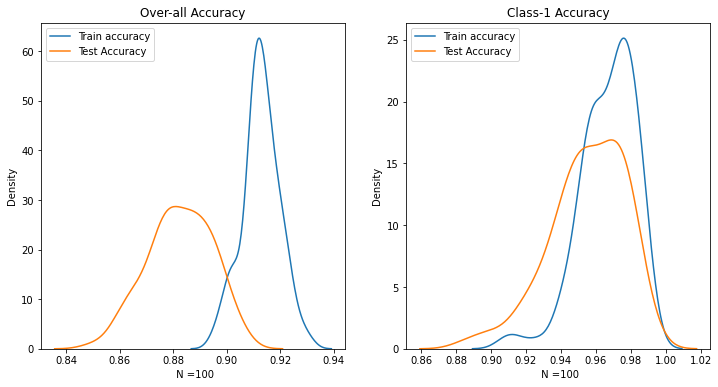

In [ ]:
plt.figure(figsize = (12,6))

plt.subplot(1,2,1)
sns.distplot(train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Over-all Accuracy')

plt.subplot(1,2,2)
sns.distplot(class1_train_acc, label = 'Train accuracy',  hist = False)
sns.distplot(class1_test_acc ,label = 'Test Accuracy',  hist = False)
plt.xlabel(' N =100')
plt.legend()
plt.title('Class-1 Accuracy')
plt.show()